In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


Capital_gain and Capital_loss columns are having outliers as their min, mean, 25% & 75% all values are 0, but the max value is very big.

#### Univariate Analysis

In [7]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

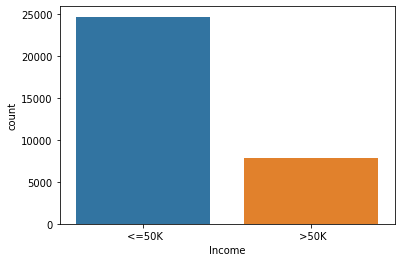

In [8]:
sns.countplot(data['Income'])

The Target Variable, 'Income' does seems imbalance, But we will check the effect of other features on Income and will decide later for balancing the dataset.

In [9]:
data.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

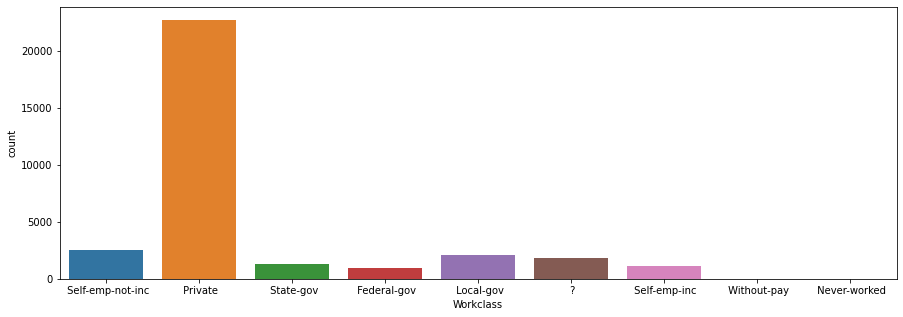

In [10]:
plt.figure(figsize = (15, 5))
sns.countplot(data['Workclass'])

plt.show()

The most number of Employee Workclass is Private. We will check the effect of Workclass over Income.

In [11]:
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

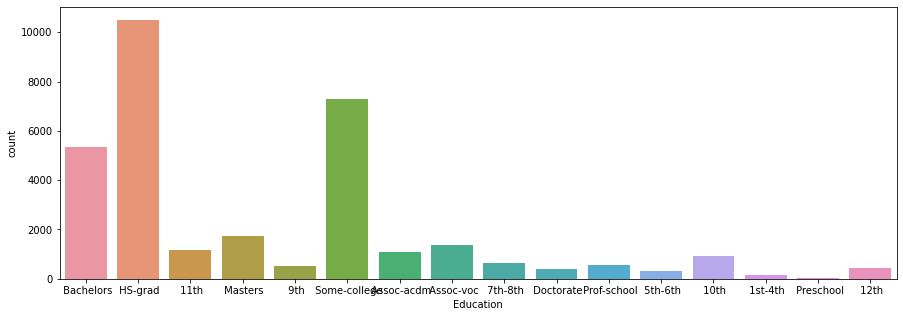

In [12]:
plt.figure(figsize = (15, 5))
sns.countplot(data['Education'])

plt.show()

Most number of persorns are High-School Grads and Some college level educated.

In [13]:
data['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

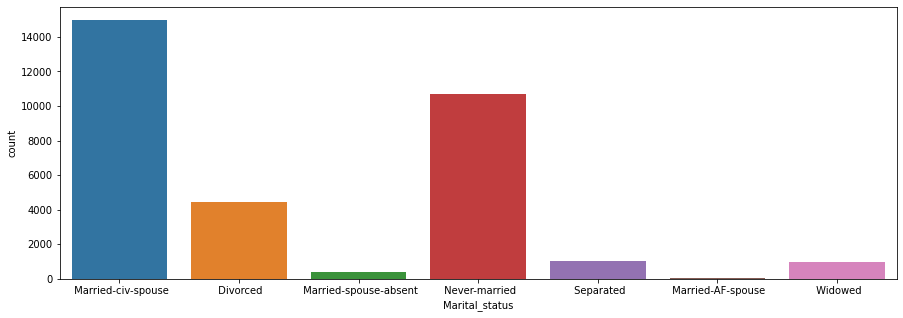

In [14]:
plt.figure(figsize = (15, 5))
sns.countplot(data['Marital_status'])

plt.show()

In [15]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

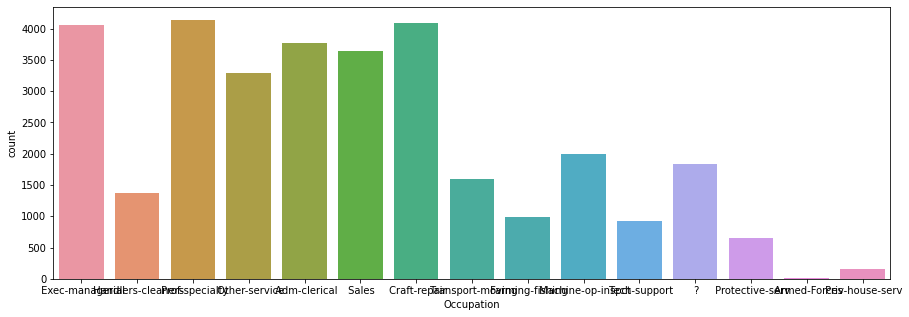

In [16]:
plt.figure(figsize = (15, 5))
sns.countplot(data['Occupation'])

plt.show()

There are some occupations exist without any description and marked as '?', we can consider this as NaN and replace them with mode value or we can consider them as no occupation and check the relation with Income column to see the effect on Income.

In [17]:
data['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

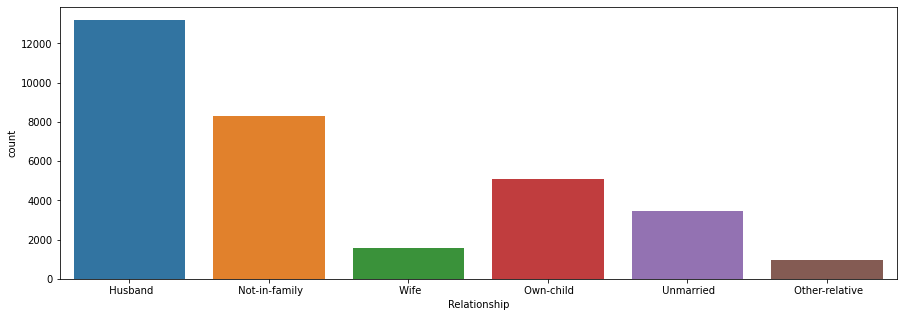

In [18]:
plt.figure(figsize = (15, 5))
sns.countplot(data['Relationship'])

plt.show()

In [19]:
data['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

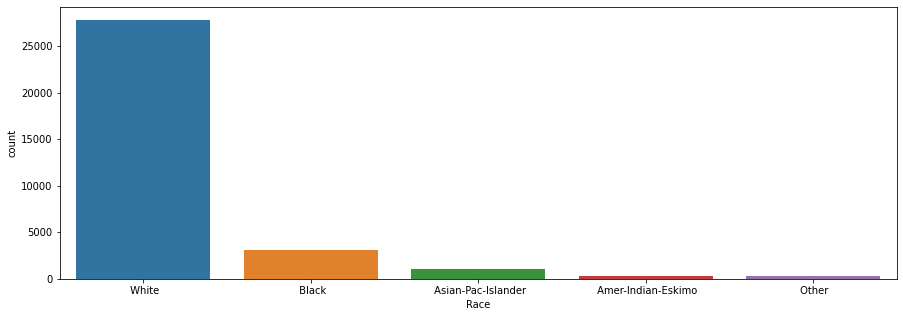

In [20]:
plt.figure(figsize = (15, 5))
sns.countplot(data['Race'])

plt.show()

In [21]:
data['Sex'].unique()

array([' Male', ' Female'], dtype=object)

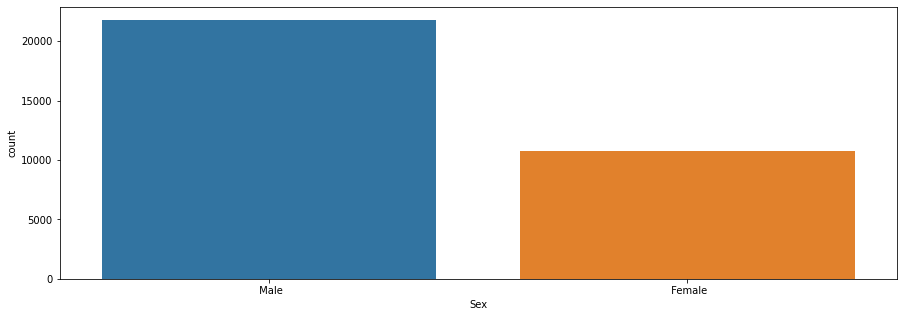

In [22]:
plt.figure(figsize = (15, 5))
sns.countplot(data['Sex'])

plt.show()

In [23]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

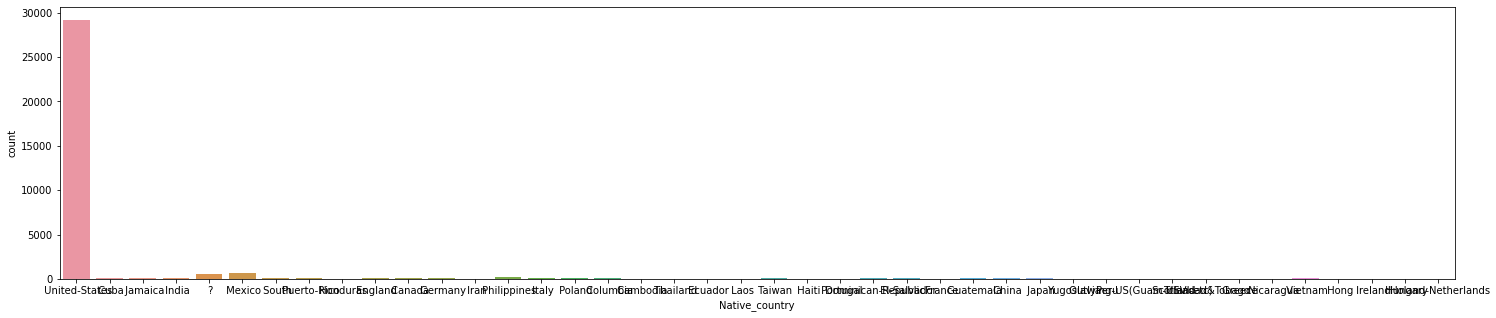

In [24]:
plt.figure(figsize = (25, 5))
sns.countplot(data['Native_country'])

plt.show()

Majorly the number of employee data belongs to United States. We will check its relation with Income.

In [25]:
data['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

There are also some values exist without any description and marked as '?', we can consider this as NaN and replace them with mode value but before that we will check the effect of Native_country over Income.

<AxesSubplot:xlabel='Age', ylabel='Density'>

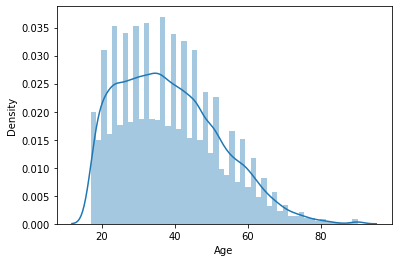

In [26]:
sns.distplot(data['Age'])

The Age column data seems to be left skewed, we will check for skewness furthur.

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

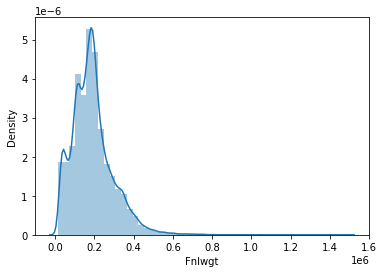

In [27]:
sns.distplot(data['Fnlwgt'])

Final weight column also having some skewness as the data seems to be left skewed.

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

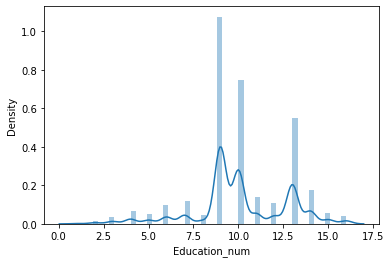

In [28]:
sns.distplot(data['Education_num'])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

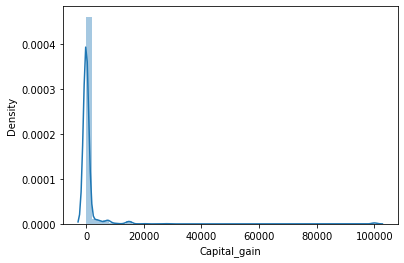

In [29]:
sns.distplot(data['Capital_gain'])

As observed earlier, a lot of values are zero in Capital_gain column.

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

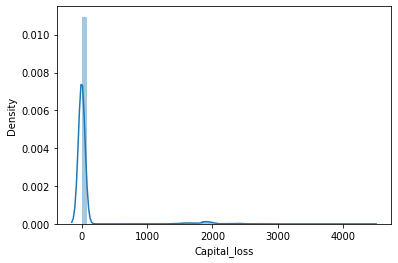

In [30]:
sns.distplot(data['Capital_loss'])

Similar to Capital_gain, the Capital_loss column also having a lot of values as Zero.

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

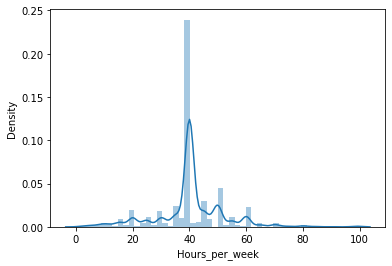

In [31]:
sns.distplot(data['Hours_per_week'])

The Hours per week column seems to be having normal distribution.

#### BiVariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Age'>

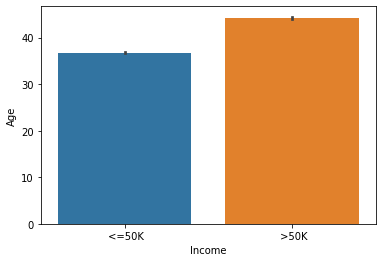

In [32]:
sns.barplot(x='Income', y='Age', data = data)

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

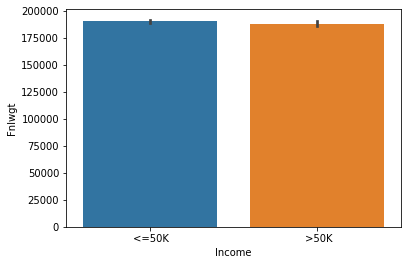

In [33]:
sns.barplot(x='Income', y='Fnlwgt', data = data)

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

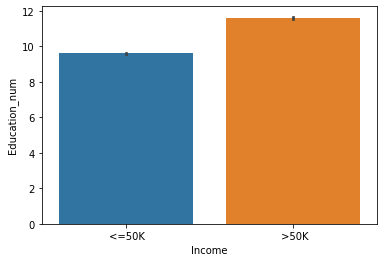

In [34]:
sns.barplot(x='Income', y='Education_num', data = data)

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

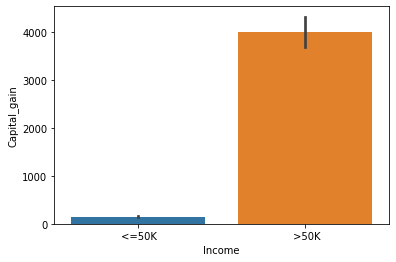

In [35]:
sns.barplot(x='Income', y='Capital_gain', data = data)

This could be because of a large number of zeroes present in the dataset.


<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

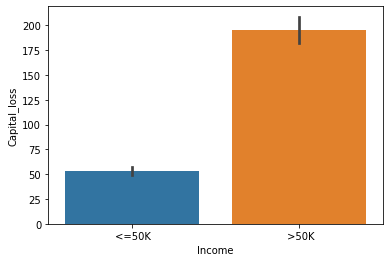

In [36]:
sns.barplot(x='Income', y='Capital_loss', data = data)

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

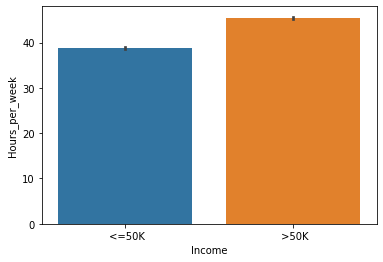

In [37]:
sns.barplot(x='Income', y='Hours_per_week', data = data)

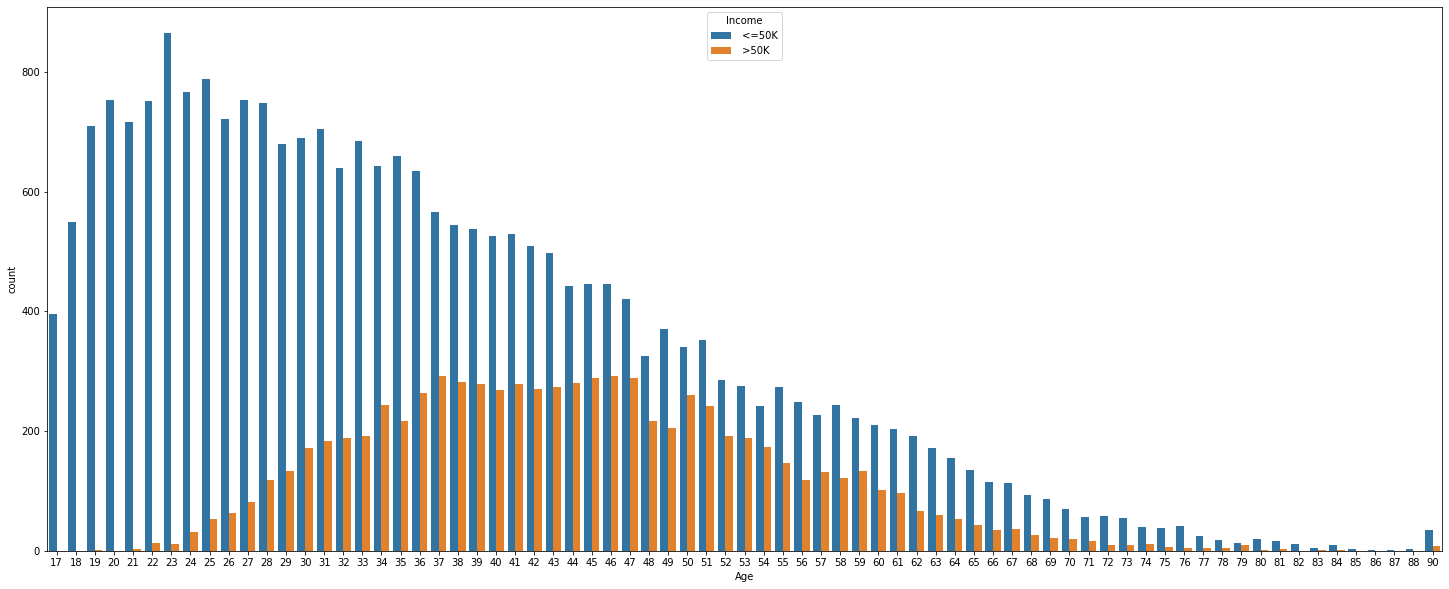

In [38]:
plt.figure(figsize = (25, 10))
sns.countplot(data['Age'], hue=data['Income'])
plt.show()

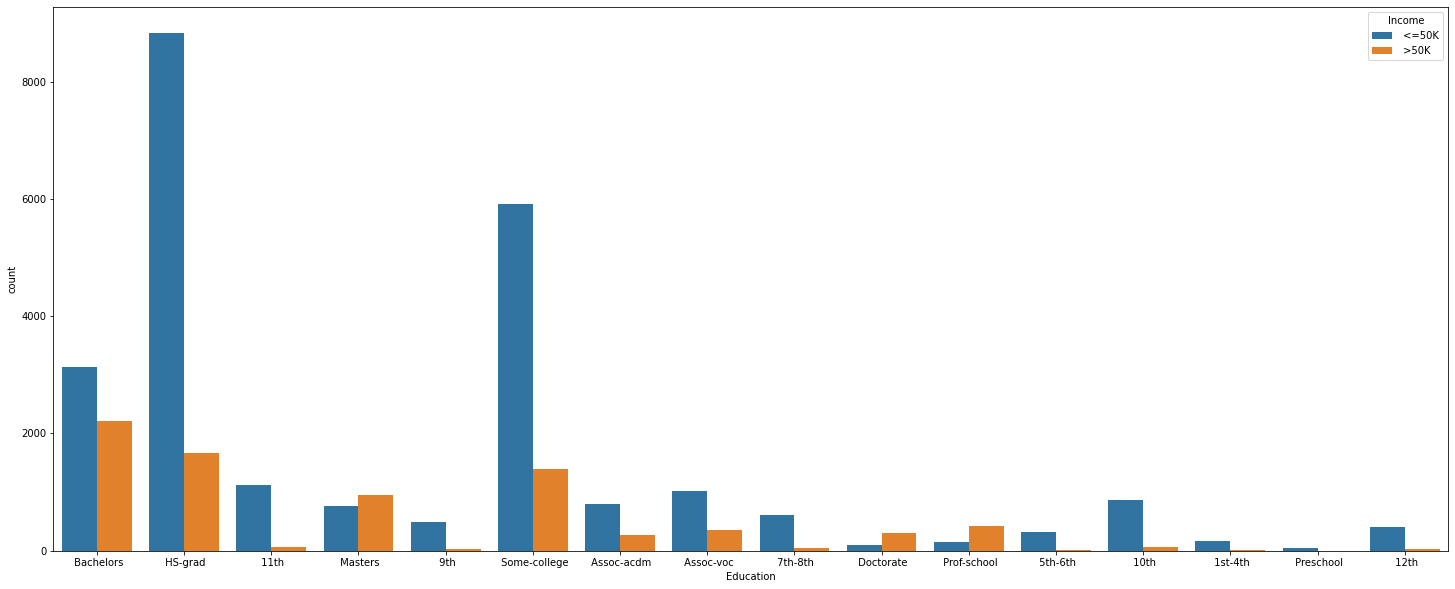

In [39]:
plt.figure(figsize = (25, 10))
sns.countplot(data['Education'], hue=data['Income'])
plt.show()

It is evident that, HS-grad, and some-college level education having more less than <50K datapoints, whereas Masters and Doctorate level Education are having more <50K datapoints.

<AxesSubplot:xlabel='Sex', ylabel='count'>

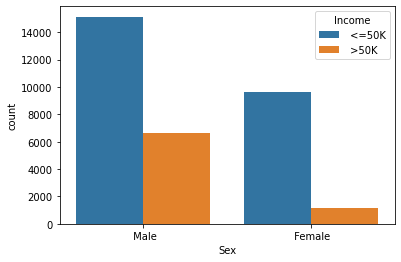

In [40]:
sns.countplot(data['Sex'], hue=data['Income'])

<AxesSubplot:xlabel='Race', ylabel='count'>

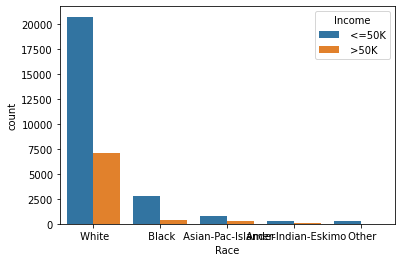

In [41]:
sns.countplot(data['Race'], hue=data['Income'])

#### Multi-Variate Analysis

In [42]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [43]:
data['Income'] = enc.fit_transform(data['Income'])

data['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

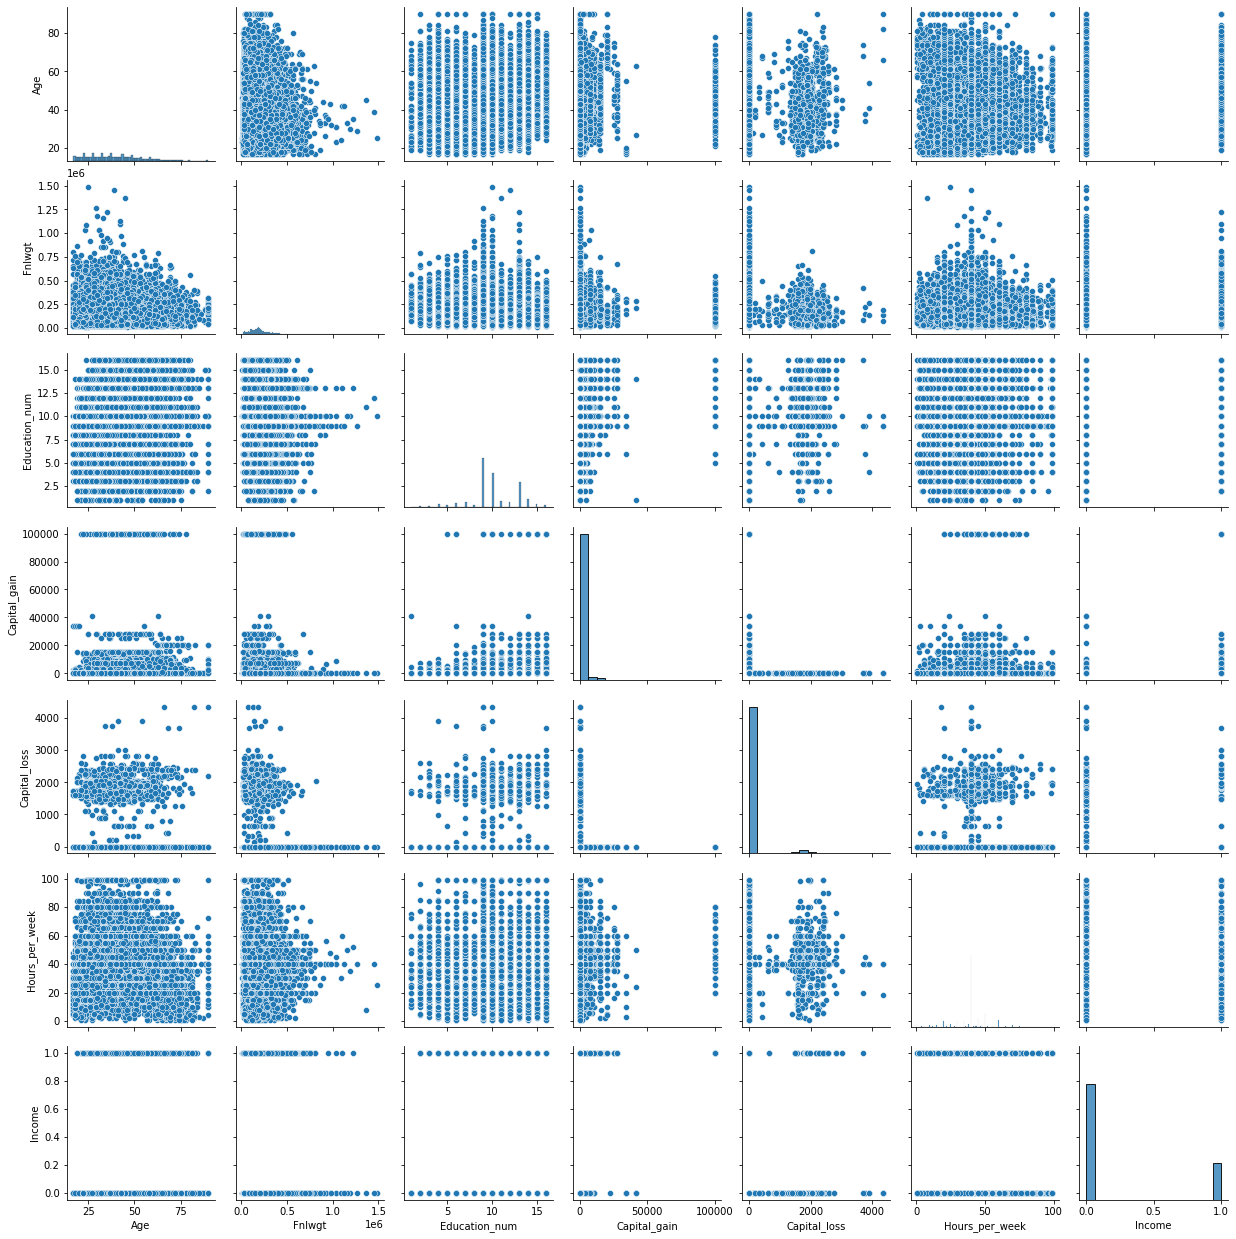

In [44]:
# Creating a pairplot of dataset
sns.pairplot(data)
plt.show()

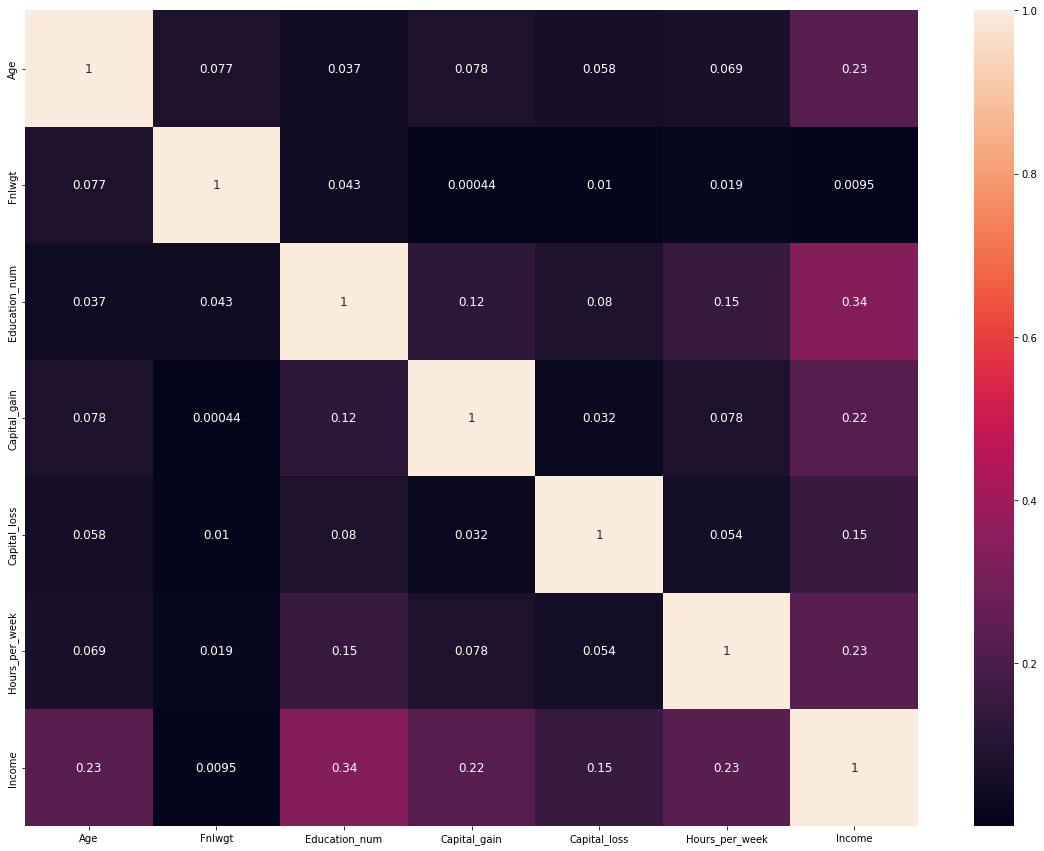

In [45]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,15))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

There seems to be very weak correlation between variables.

### Data Processing

In [46]:
data[['Workclass', 'Occupation', 'Native_country']] = data[['Workclass', 'Occupation', 'Native_country']].replace(' ?', np.NaN)

In [47]:
# Checking Null Values in Dataset

data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [48]:
a = ['Workclass', 'Occupation', 'Native_country']


for i in a:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [49]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no Null Values present in the Dataset. Therefore, We can proceed furthur.

### Encoding the Categorical data

In [50]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

elements = data.select_dtypes(include=['object']).columns

elements

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country'],
      dtype='object')

In [51]:
for i in elements:
    data[i] = enc.fit_transform(data[i])

In [52]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


### Checking Skewness and Outliers

In [53]:
x = data.drop(['Income'], axis=1)
y = data['Income']

In [54]:
print(x.shape)
print(y.shape)

(32560, 14)
(32560,)


In [55]:
x.skew().sort_values(ascending = False)

Capital_gain      11.953690
Capital_loss       4.594549
Fnlwgt             1.446972
Relationship       0.786784
Age                0.558738
Hours_per_week     0.227636
Workclass          0.076178
Occupation         0.000536
Marital_status    -0.013448
Education_num     -0.311630
Sex               -0.719244
Education         -0.934063
Race              -2.435332
Native_country    -4.243083
dtype: float64

There is skewness present in the dataset. Therefore, we will use power transformation to remove skewness.

In [56]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [57]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

Capital_loss      4.299511
Capital_gain      3.016951
Hours_per_week    0.229556
Workclass         0.216967
Relationship      0.122917
Education_num     0.023885
Fnlwgt            0.016914
Age              -0.013897
Marital_status   -0.114201
Occupation       -0.237163
Education        -0.309431
Sex              -0.719244
Race             -2.010817
Native_country   -2.981838
dtype: float64

Skewness Values is high for Capital_loss and Capital_gain columns, because of number of zero values present in the dataset.

Whereas, Race and Native_country is categorical Data.

In [58]:
x = pd.DataFrame(x_new, columns = x.columns)

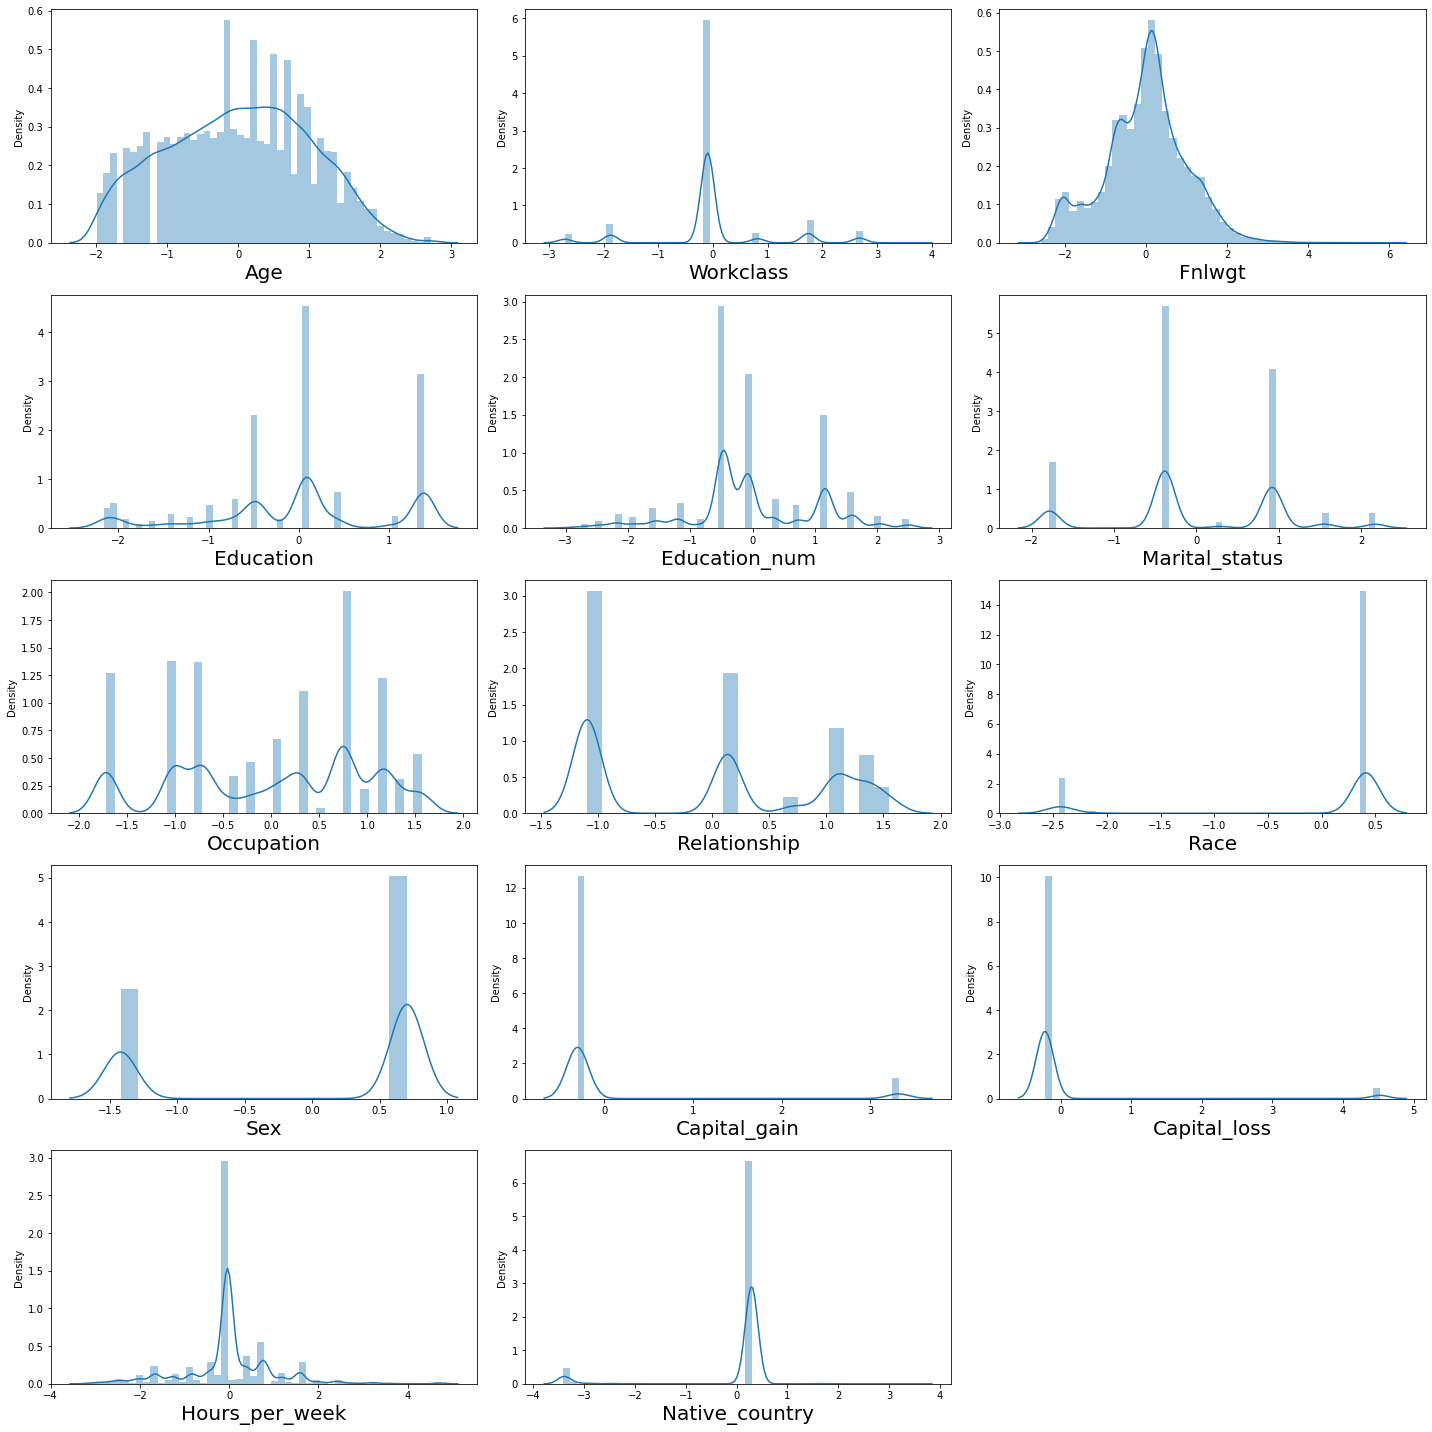

In [59]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

Compared to earlier graphs, Now the dataset looks more normalized.

### Checking Outliers

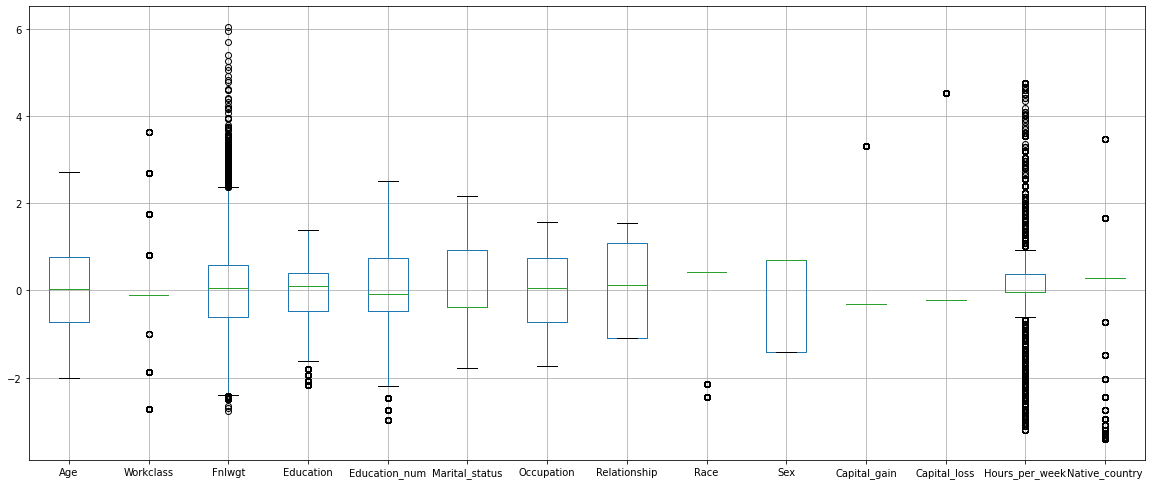

In [60]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

There are many outliers present in the columns, Therefore we need to remove the outliers before proceeding furthur.

In [61]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Age                True
Workclass         False
Fnlwgt            False
Education          True
Education_num      True
Marital_status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
dtype: bool
****************************************
Low Side Outliers Present
Age                True
Workclass          True
Fnlwgt             True
Education          True
Education_num      True
Marital_status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital_gain       True
Capital_loss       True
Hours_per_week    False
Native_country    False
dtype: bool


Features having outliers in High Side are: 1. Workclass, 2.Fnlwgt, 3. Capital_gain, 4. Capital_loss, 5.Hours_per_week, 6. Native_country

Features having outliers in Low side are: 1. Hours_per_week, 2. Native_country

In [62]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [63]:
Workclass_high = q3.Workclass + (1.5 * iqr.Workclass)

# Check the Indexes which have higher values

index1 = np.where(x['Workclass']> Workclass_high)

x = x.drop(x['Workclass'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(27592, 14)
(27592,)


In [64]:
Fnlwgt_high = q3.Fnlwgt + (1.5 * iqr.Fnlwgt)

# Check the Indexes which have higher values

index1 = np.where(x['Fnlwgt']> Fnlwgt_high)

x = x.drop(x['Fnlwgt'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(27305, 14)
(27305,)


In [65]:
Capital_gain_high = q3.Capital_gain + (1.5 * iqr.Capital_gain)

# Check the Indexes which have higher values

index1 = np.where(x['Capital_gain']> Capital_gain_high)

x = x.drop(x['Capital_gain'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(25187, 14)
(25187,)


In [66]:
Capital_loss_high = q3.Capital_loss + (1.5 * iqr.Capital_loss)

# Check the Indexes which have higher values

index1 = np.where(x['Capital_loss']> Capital_loss_high)

x = x.drop(x['Capital_loss'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(23970, 14)
(23970,)


In [67]:
Hours_per_week_high = q3.Hours_per_week + (1.5 * iqr.Hours_per_week)

# Check the Indexes which have higher values

index1 = np.where(x['Hours_per_week']> Hours_per_week_high)

x = x.drop(x['Hours_per_week'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(22028, 14)
(22028,)


In [68]:
Native_country_high = q3.Native_country + (1.5 * iqr.Native_country)

# Check the Indexes which have higher values

index1 = np.where(x['Native_country']> Native_country_high)

x = x.drop(x['Native_country'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(21966, 14)
(21966,)


In [69]:
Hours_per_week_low = q1.Hours_per_week - (1.5 * iqr.Hours_per_week)

# Check the Indexes which have higher values

index1 = np.where(x['Hours_per_week']< Hours_per_week_low)

x = x.drop(x['Hours_per_week'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(17626, 14)
(17626,)


In [70]:
Native_country_low = q1.Native_country - (1.5 * iqr.Native_country)

# Check the Indexes which have higher values

index1 = np.where(x['Native_country']< Native_country_low)

x = x.drop(x['Native_country'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(15977, 14)
(15977,)


In [71]:
# Percentage Loss of Data

Data_loss = ((32560-15977)/32560)*100

Data_loss

50.93058968058968

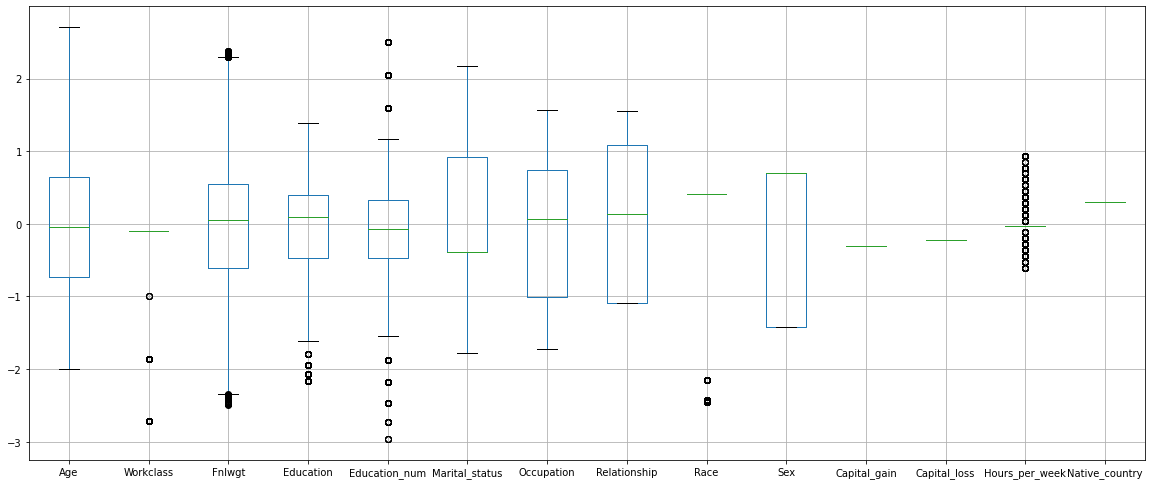

In [72]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

After Removal of Outliers, we are loosing around 50% data. And, even after that, the values lies outside Z-Score +3 & -3. Therefore, We will use Feature Selection method, to find out number of features which actually contributes to the Prediction of Target Variable.

In [73]:
new_x = data.drop(['Income'], axis=1)
new_y = data['Income']

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
fit = selector.fit(new_x, new_y)
feature_imp = selector.feature_importances_
feature_imp

array([0.1559684 , 0.0413898 , 0.1670879 , 0.03872617, 0.08659868,
       0.080906  , 0.07254332, 0.0854393 , 0.01461795, 0.02859128,
       0.08835361, 0.0281493 , 0.09635026, 0.01527803])

In [75]:
new_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


we can cleary see, that there are some columns for which the Feature_selection_score is less. therefore we will drop these columns and will only use columns with High value of feature selection score.

In [76]:
new_x = new_x.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country', 'Capital_gain'], axis=1)

new_x

,Age,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Hours_per_week
0,50,83311,13,2,3,0,13
1,38,215646,9,0,5,1,40
2,53,234721,7,2,5,0,40
3,28,338409,13,2,9,5,40
4,37,284582,14,2,3,5,40
...,...,...,...,...,...,...,...
32555,27,257302,12,2,12,5,38
32556,40,154374,9,2,6,0,40
32557,58,151910,9,6,0,4,40
32558,22,201490,9,4,0,3,20


In [77]:
new_x.skew().sort_values(ascending = False)

Fnlwgt            1.446972
Relationship      0.786784
Age               0.558738
Hours_per_week    0.227636
Occupation        0.000536
Marital_status   -0.013448
Education_num    -0.311630
dtype: float64

There is some Skewness present in Fnlwgt column, therefore we will use power transformation to remove skewness.

In [78]:
from sklearn.preprocessing import power_transform
x_n = power_transform(new_x)

In [79]:
pd.DataFrame(x_n, columns = new_x.columns).skew().sort_values(ascending = False)

Hours_per_week    0.229556
Relationship      0.122917
Education_num     0.023885
Fnlwgt            0.016914
Age              -0.013897
Marital_status   -0.114201
Occupation       -0.237163
dtype: float64

In [80]:
new_x = pd.DataFrame(x_n, columns = new_x.columns)

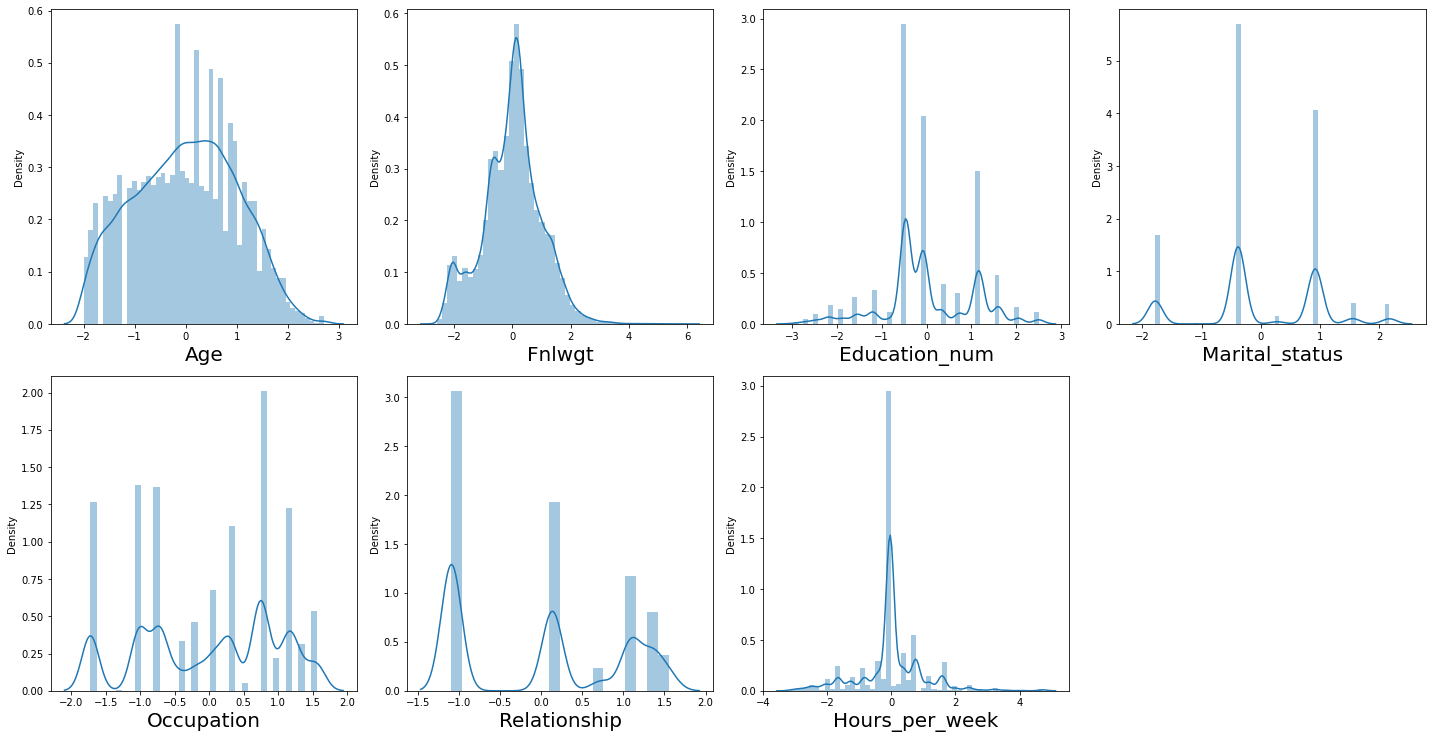

In [81]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in new_x:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(new_x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

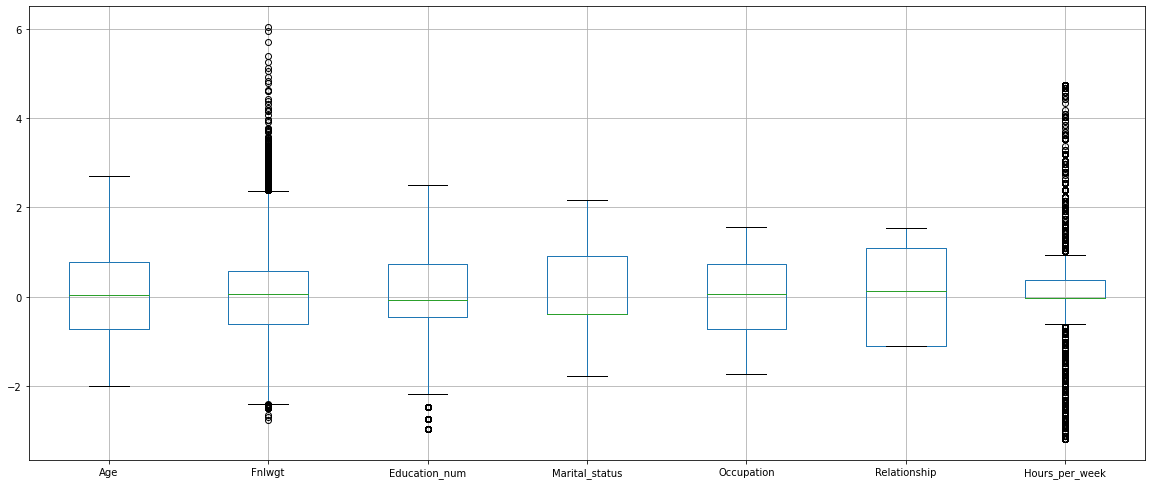

In [82]:
new_x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [83]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(new_x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(new_x)>-3).all())

High Side Outliers present
Age                True
Fnlwgt            False
Education_num      True
Marital_status     True
Occupation         True
Relationship       True
Hours_per_week    False
dtype: bool
****************************************
Low Side Outliers Present
Age                True
Fnlwgt             True
Education_num      True
Marital_status     True
Occupation         True
Relationship       True
Hours_per_week    False
dtype: bool


In [84]:
# Validating OUtliers

#1st Quantile
q1 = new_x.quantile(0.25)

#3rd quantile
q3 = new_x.quantile(0.75)

#IQR
iqr = q3 - q1

In [85]:
Fnlwgt_high = q3.Fnlwgt + (1.5 * iqr.Fnlwgt)

# Check the Indexes which have higher values

index1 = np.where(new_x['Fnlwgt']> Fnlwgt_high)

new_x = new_x.drop(new_x['Fnlwgt'].index[index1])

new_y = new_y.drop(new_y.index[index1])

print(new_x.shape)
print(new_y.shape)

(32242, 7)
(32242,)


In [86]:
Hours_per_week_high = q3.Hours_per_week + (1.5 * iqr.Hours_per_week)

# Check the Indexes which have higher values

index1 = np.where(new_x['Hours_per_week']> Hours_per_week_high)

new_x = new_x.drop(new_x['Hours_per_week'].index[index1])

new_y = new_y.drop(new_y.index[index1])

print(new_x.shape)
print(new_y.shape)

(28774, 7)
(28774,)


In [87]:
Hours_per_week_low = q1.Hours_per_week - (1.5 * iqr.Hours_per_week)

# Check the Indexes which have higher values

index1 = np.where(new_x['Hours_per_week']< Hours_per_week_low)

new_x = new_x.drop(new_x['Hours_per_week'].index[index1])

new_y = new_y.drop(new_y.index[index1])

print(new_x.shape)
print(new_y.shape)

(23315, 7)
(23315,)


In [88]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(new_x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(new_x)>-3).all())

High Side Outliers present
Age               True
Fnlwgt            True
Education_num     True
Marital_status    True
Occupation        True
Relationship      True
Hours_per_week    True
dtype: bool
****************************************
Low Side Outliers Present
Age                True
Fnlwgt             True
Education_num     False
Marital_status     True
Occupation         True
Relationship       True
Hours_per_week     True
dtype: bool


There are still some outliers present in the Education_num column. We will remove them and will proceed furthur.

In [89]:
# Validating OUtliers

#1st Quantile
q1 = new_x.quantile(0.25)

#3rd quantile
q3 = new_x.quantile(0.75)

#IQR
iqr = q3 - q1

In [90]:
Education_num_low = q1.Education_num - (1.5 * iqr.Education_num)

# Check the Indexes which have higher values

index1 = np.where(new_x['Education_num']< Education_num_low)

new_x = new_x.drop(new_x['Education_num'].index[index1])

new_y = new_y.drop(new_y.index[index1])

print(new_x.shape)
print(new_y.shape)

(23284, 7)
(23284,)


In [91]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(new_x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(new_x)>-3).all())

High Side Outliers present
Age               True
Fnlwgt            True
Education_num     True
Marital_status    True
Occupation        True
Relationship      True
Hours_per_week    True
dtype: bool
****************************************
Low Side Outliers Present
Age               True
Fnlwgt            True
Education_num     True
Marital_status    True
Occupation        True
Relationship      True
Hours_per_week    True
dtype: bool


Now the outliers are removed, lets check the plot and Percentage data loss

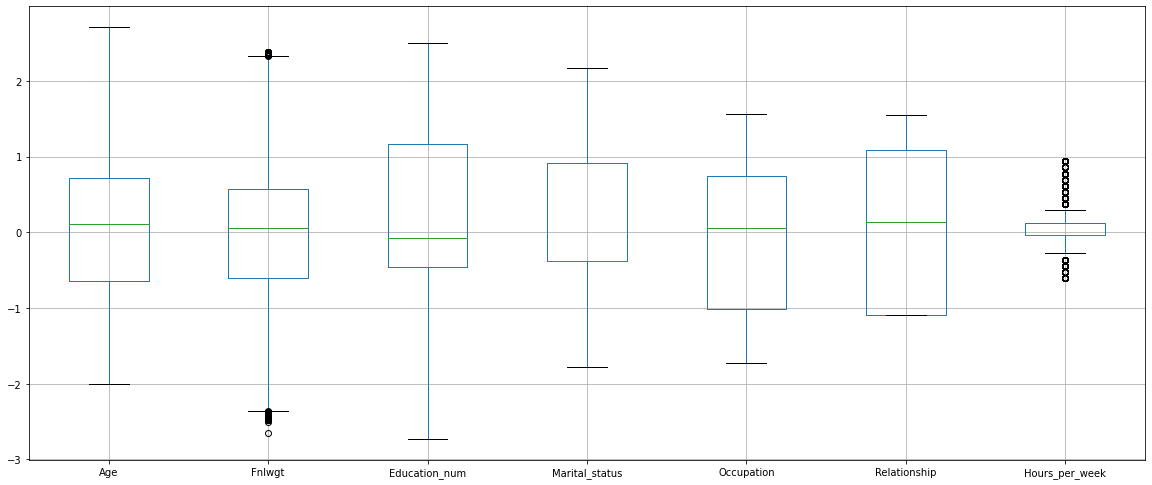

In [92]:
new_x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [93]:
# Percentage Loss of Data

Data_loss = ((32560-23284)/32560)*100

Data_loss

28.48894348894349

As compared to previously, there is only 28% data loss after removal of outliers. Therefore, we can proceed furthur with feature selection method.

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(new_x)

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = new_x.columns


# Lets check the values 
vif

,vif,features
0,1.185271,Age
1,1.006995,Fnlwgt
2,1.034293,Education_num
3,1.132809,Marital_status
4,1.016338,Occupation
5,1.161766,Relationship
6,1.060311,Hours_per_week


All columns are having VIF values around 1, which means there is no correlation exists between the features.

## Model Building

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [98]:
maxAccu = 0
maxRS = 0

model = [LogisticRegression(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         xgb.XGBClassifier()]

for rs in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, new_y, test_size = 0.25, random_state = rs)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print('Accuracy score', acc, 'random_state', rs, 'Model', i)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = rs
            final_model = i
            
        
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Accuracy score 0.8115444081772891 random_state 1 Model LogisticRegression()
Accuracy score 0.810857241023879 random_state 1 Model RandomForestClassifier()
Accuracy score 0.7551967015976636 random_state 1 Model DecisionTreeClassifier()
Accuracy score 0.804844528431541 random_state 1 Model KNeighborsClassifier()
Accuracy score 0.8194468304415049 random_state 1 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='aut

Accuracy score 0.8039855694897784 random_state 9 Model RandomForestClassifier()
Accuracy score 0.7522762411956708 random_state 9 Model DecisionTreeClassifier()
Accuracy score 0.8031266105480158 random_state 9 Model KNeighborsClassifier()
Accuracy score 0.815152035732692 random_state 9 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy 

Accuracy score 0.8017522762411957 random_state 17 Model RandomForestClassifier()
Accuracy score 0.7553684933860162 random_state 17 Model DecisionTreeClassifier()
Accuracy score 0.794880604707095 random_state 17 Model KNeighborsClassifier()
Accuracy score 0.8163545782511596 random_state 17 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accur

Accuracy score 0.8106854492355265 random_state 25 Model RandomForestClassifier()
Accuracy score 0.7584607455763615 random_state 25 Model DecisionTreeClassifier()
Accuracy score 0.8086239477752963 random_state 25 Model KNeighborsClassifier()
Accuracy score 0.8192750386531524 random_state 25 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8015804844528431 random_state 33 Model RandomForestClassifier()
Accuracy score 0.7562274523277788 random_state 33 Model DecisionTreeClassifier()
Accuracy score 0.7938498539769799 random_state 33 Model KNeighborsClassifier()
Accuracy score 0.8225390826318502 random_state 33 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8039855694897784 random_state 41 Model RandomForestClassifier()
Accuracy score 0.7613812059783542 random_state 41 Model DecisionTreeClassifier()
Accuracy score 0.7938498539769799 random_state 41 Model KNeighborsClassifier()
Accuracy score 0.8141212850025769 random_state 41 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8050163202198934 random_state 49 Model RandomForestClassifier()
Accuracy score 0.7459199450266277 random_state 49 Model DecisionTreeClassifier()
Accuracy score 0.8019240680295482 random_state 49 Model KNeighborsClassifier()
Accuracy score 0.820133997594915 random_state 49 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accur

Accuracy score 0.8105136574471741 random_state 57 Model RandomForestClassifier()
Accuracy score 0.7677375021473973 random_state 57 Model DecisionTreeClassifier()
Accuracy score 0.8062188627383611 random_state 57 Model KNeighborsClassifier()
Accuracy score 0.826146710187253 random_state 57 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accur

Accuracy score 0.8055316955849511 random_state 65 Model RandomForestClassifier()
Accuracy score 0.748668613640268 random_state 65 Model DecisionTreeClassifier()
Accuracy score 0.8019240680295482 random_state 65 Model KNeighborsClassifier()
Accuracy score 0.8194468304415049 random_state 65 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accur

Accuracy score 0.8053599037965985 random_state 73 Model RandomForestClassifier()
Accuracy score 0.7546813262326061 random_state 73 Model DecisionTreeClassifier()
Accuracy score 0.805875279161656 random_state 73 Model KNeighborsClassifier()
Accuracy score 0.8184160797113897 random_state 73 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accur

Accuracy score 0.8082803641985913 random_state 81 Model RandomForestClassifier()
Accuracy score 0.7672221267823398 random_state 81 Model DecisionTreeClassifier()
Accuracy score 0.8019240680295482 random_state 81 Model KNeighborsClassifier()
Accuracy score 0.8228826662085552 random_state 81 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.8103418656588215 random_state 89 Model RandomForestClassifier()
Accuracy score 0.7682528775124549 random_state 89 Model DecisionTreeClassifier()
Accuracy score 0.8069060298917712 random_state 89 Model KNeighborsClassifier()
Accuracy score 0.8206493729599725 random_state 89 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.805875279161656 random_state 97 Model RandomForestClassifier()
Accuracy score 0.754337742655901 random_state 97 Model DecisionTreeClassifier()
Accuracy score 0.7967703143789727 random_state 97 Model KNeighborsClassifier()
Accuracy score 0.8182442879230373 random_state 97 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accura

Accuracy score 0.8039855694897784 random_state 105 Model RandomForestClassifier()
Accuracy score 0.7496993643703831 random_state 105 Model DecisionTreeClassifier()
Accuracy score 0.8031266105480158 random_state 105 Model KNeighborsClassifier()
Accuracy score 0.8173853289812747 random_state 105 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8089675313520014 random_state 113 Model RandomForestClassifier()
Accuracy score 0.7551967015976636 random_state 113 Model DecisionTreeClassifier()
Accuracy score 0.7955677718605051 random_state 113 Model KNeighborsClassifier()
Accuracy score 0.8172135371929222 random_state 113 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8137777014258718 random_state 121 Model RandomForestClassifier()
Accuracy score 0.7491839890053256 random_state 121 Model DecisionTreeClassifier()
Accuracy score 0.8026112351829583 random_state 121 Model KNeighborsClassifier()
Accuracy score 0.8259749183989006 random_state 121 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8045009448548359 random_state 129 Model RandomForestClassifier()
Accuracy score 0.759319704518124 random_state 129 Model DecisionTreeClassifier()
Accuracy score 0.8003779419343755 random_state 129 Model KNeighborsClassifier()
Accuracy score 0.8189314550764474 random_state 129 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8070778216801237 random_state 137 Model RandomForestClassifier()
Accuracy score 0.7529634083490809 random_state 137 Model DecisionTreeClassifier()
Accuracy score 0.8014086926644907 random_state 137 Model KNeighborsClassifier()
Accuracy score 0.8173853289812747 random_state 137 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8055316955849511 random_state 145 Model RandomForestClassifier()
Accuracy score 0.7448891942965127 random_state 145 Model DecisionTreeClassifier()
Accuracy score 0.7988318158392029 random_state 145 Model KNeighborsClassifier()
Accuracy score 0.8187596632880948 random_state 145 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8086239477752963 random_state 153 Model RandomForestClassifier()
Accuracy score 0.7563992441161312 random_state 153 Model DecisionTreeClassifier()
Accuracy score 0.8026112351829583 random_state 153 Model KNeighborsClassifier()
Accuracy score 0.8215083319017351 random_state 153 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.805188112008246 random_state 161 Model RandomForestClassifier()
Accuracy score 0.759319704518124 random_state 161 Model DecisionTreeClassifier()
Accuracy score 0.7967703143789727 random_state 161 Model KNeighborsClassifier()
Accuracy score 0.8182442879230373 random_state 161 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.8163545782511596 random_state 169 Model RandomForestClassifier()
Accuracy score 0.7680810857241024 random_state 169 Model DecisionTreeClassifier()
Accuracy score 0.7971138979556777 random_state 169 Model KNeighborsClassifier()
Accuracy score 0.825459543033843 random_state 169 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8019240680295482 random_state 177 Model RandomForestClassifier()
Accuracy score 0.7512454904655558 random_state 177 Model DecisionTreeClassifier()
Accuracy score 0.7936780621886274 random_state 177 Model KNeighborsClassifier()
Accuracy score 0.8136059096375193 random_state 177 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8069060298917712 random_state 185 Model RandomForestClassifier()
Accuracy score 0.7502147397354406 random_state 185 Model DecisionTreeClassifier()
Accuracy score 0.8003779419343755 random_state 185 Model KNeighborsClassifier()
Accuracy score 0.8191032468647998 random_state 185 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8086239477752963 random_state 193 Model RandomForestClassifier()
Accuracy score 0.7615529977667067 random_state 193 Model DecisionTreeClassifier()
Accuracy score 0.8005497337227281 random_state 193 Model KNeighborsClassifier()
Accuracy score 0.820821164748325 random_state 193 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

In [99]:
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Max Accuracy score is 0.8342209242398213 at random_state 199 for Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [102]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, new_y, test_size = 0.25, random_state = 199)

import xgboost as xgb
xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                        colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                        early_stopping_rounds=None, enable_categorical=False,
                        eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                        importance_type=None, interaction_constraints='',
                        learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
                        max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                        monotone_constraints='()', n_estimators=100,
                        n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
                        reg_alpha=0, reg_lambda=1)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

for i in range (2,10):
    cvscore = cross_val_score(xgb, x_scaled, new_y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy_Score is : ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8182442879230373
At CV: 2
Cross Validation Score is:  81.29616904311973
Accuracy_Score is :  0.8182442879230373
At CV: 3
Cross Validation Score is:  81.57962561039528
Accuracy_Score is :  0.8182442879230373
At CV: 4
Cross Validation Score is:  81.6784057722041
Accuracy_Score is :  0.8182442879230373
At CV: 5
Cross Validation Score is:  81.84590853513203
Accuracy_Score is :  0.8182442879230373
At CV: 6
Cross Validation Score is:  81.86313554181929
Accuracy_Score is :  0.8182442879230373
At CV: 7
Cross Validation Score is:  81.78147405420356
Accuracy_Score is :  0.8182442879230373
At CV: 8
Cross Validation Score is:  82.03062120101382
Accuracy_Score is :  0.8182442879230373
At CV: 9
Cross Validation Score is:  81.95328914749047
Accuracy_Score is :  0.8182442879230373


In [103]:
cvscore_selected = cross_val_score(xgb, x_scaled, new_y, cv = 8).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy_Score is: ", accuracy_score(y_test, y_pred))

The CV Score is:  0.8203062120101381 
The Accuracy_Score is:  0.8182442879230373


### Parameter Tuning using GridSearchCV

In [104]:
from sklearn.model_selection import GridSearchCV

# HyperParameter Tuning

param_grid = {'n_estimators' : np.arange(10,100,10), 
              'max_depth': np.arange(1,21,5)}

import xgboost as xgb
clf = xgb.XGBClassifier()

grd = GridSearchCV(clf, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

grd = grd.best_estimator_      # reinstiating with best parameters

grd.fit(x_train, y_train)
pred = grd.predict(x_test)

xgb_conf_mat = confusion_matrix(y_test, pred)

print('\nconf_mat ==>', '\n', xgb_conf_mat)

print('\nAccuracy Score ==>', '\n', accuracy_score(y_test, pred))

Best Param ==> {'max_depth': 6, 'n_estimators': 10}

conf_mat ==> 
 [[3923  388]
 [ 648  862]]

Accuracy Score ==> 
 0.8220237072667926


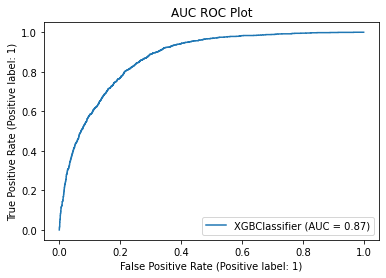

In [105]:
# auc roc plot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

# auc roc plot
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(x_train, y_train)

pred = clf.predict(x_test)
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4311
           1       0.68      0.57      0.62      1510

    accuracy                           0.82      5821
   macro avg       0.77      0.74      0.75      5821
weighted avg       0.81      0.82      0.81      5821



Final Accuracy is 82% and AUC score is 87%, which is very good.

In [107]:
# Saving the Model

import joblib
joblib.dump(clf, "Census_Income_Project.pkl")

['Census_Income_Project.pkl']